In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
lpn_df = pd.read_csv("eval_data/LPN_eval_tuned.csv")
base_line_df = pd.read_csv("eval_data/pretrain_eval.csv", skiprows=[0,2], header = None).T
maml_df = pd.read_csv("eval_data/maml_eval.csv", skiprows=[0,2], header = None).T
base_line_df.columns = ["mu", "ci"]
maml_df.columns = ["mu", "ci"]


## Model Comparison

Compare Deterministic LPN with MAML and baseline model. All models were trained on 30000 iterations with 25 tasks each and tested on 600 tasks. The LPN was trained and evaluated in lpn4sine_deterministic.ipynb. 

LPN model:
- Encoder: phi=ReluNet(2, 32, 32),
           rho_0=ReluNet(32, 32, 16),
           rho_1=ReluNet(16, 8, d_latent)

- Decoder: d_hidden = [32, 32]

- Dimension of latent representation: 2

- Number of gradident optimizations of Z in training: 2
- Number of gradident optimizations Z in test: 10

Remarks: 
- The model has more parameters than MAML. MAML is 2 layer MLP with layer size of 40.
- Could tune for even smaller LPN models. Can use lp4sine_deterministic_tuning notebook for that 

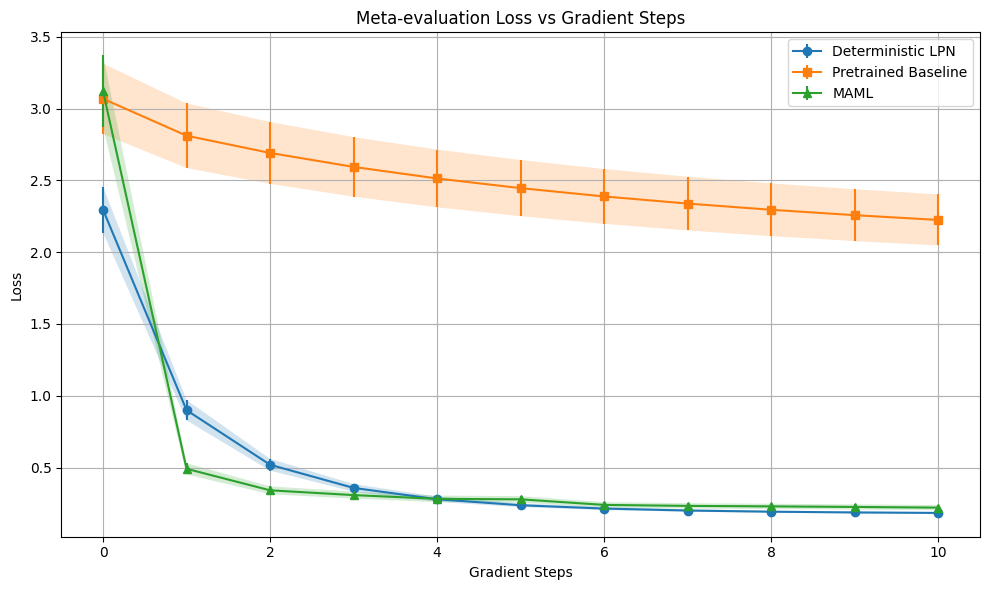

In [56]:
# Helper function to extract plot components
def extract_plot_data(df):
    mu = df["mu"].values
    ci = df["ci"].values
    lower_err = np.minimum(ci, mu)  # ensures lower bound ≥ 0
    upper_err = ci
    yerr = np.vstack([lower_err, upper_err])
    lower_bound = np.maximum(0, mu - ci)
    upper_bound = mu + ci
    return mu, yerr, lower_bound, upper_bound

# X-axis
test_numstep = len(lpn_df) - 1
x = np.arange(test_numstep + 1)

# Create the plot
plt.figure(figsize=(10, 6))

# LPN
mu_lpn, yerr_lpn, lb_lpn, ub_lpn = extract_plot_data(lpn_df)
plt.errorbar(x, mu_lpn, yerr=yerr_lpn, fmt='-o', label="Deterministic LPN")
plt.fill_between(x, lb_lpn, ub_lpn, alpha=0.2)

# Baseline
mu_base, yerr_base, lb_base, ub_base = extract_plot_data(base_line_df)
plt.errorbar(x, mu_base, yerr=yerr_base, fmt='-s', label="Pretrained Baseline")
plt.fill_between(x, lb_base, ub_base, alpha=0.2)

# MAML
mu_maml, yerr_maml, lb_maml, ub_maml = extract_plot_data(maml_df)
plt.errorbar(x, mu_maml, yerr=yerr_maml, fmt='-^', label="MAML")
plt.fill_between(x, lb_maml, ub_maml, alpha=0.2)

# Labels and legend
plt.xlabel('Gradient Steps')
plt.ylabel('Loss')
plt.title('Meta-evaluation Loss vs Gradient Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
    